## CMPINF 2100 Week 06

### Visualizing combinations between multiple categorical variables

We previously learned how to show the MARGINAL count for the categories of a SINGLE categorical variable. We will now learn how examine the COMBINATION or RELATIONSHIP between several categorical variables.

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

We will only use the Penguins data set for this notebook.

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Marginal counts

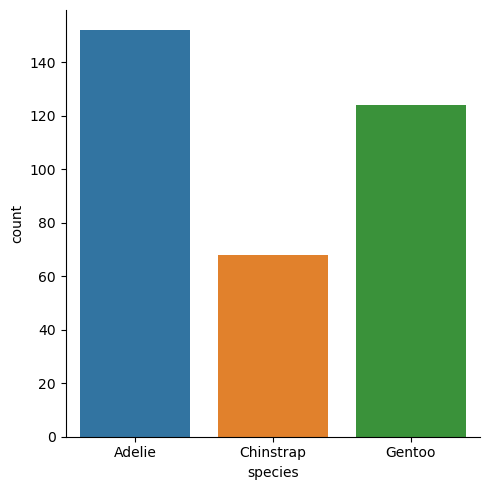

In [4]:
sns.catplot( data = penguins, x='species', kind='count' )

plt.show()

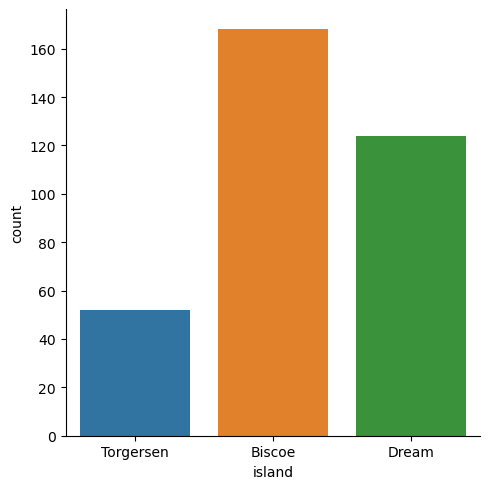

In [5]:
sns.catplot(data = penguins, x='island', kind='count')

plt.show()

But...what is the relationship between these two categorical variables? Or...what are the COUNTS for the **COMBINATIONS** between the two categorical variables??

Let's first use `.groupby()` method to apply the `.size()` method to each UNIQUE COMBINATION!!!!

In [8]:
penguins.groupby(['species', 'island']).size().reset_index(name='num_rows')

,species,island,num_rows
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


Let's confirm what's happening by filtering the data.

In [9]:
penguins.loc[ (penguins.species == 'Adelie') & (penguins.island == 'Biscoe'), : ].shape

(44, 7)

We are NOT asking how many rows are associated with `species == 'Adelie'`. 

In [10]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
44+56+52

152

## Visualize combinations

Combinations can be shown using bar charts through subplots or **facets**. A facet is another term for subplot.

Seaborn allows associating subplots or **facets** within columns in the dataframe!

Facets can only be easily created using FIGURE LEVEL functions in Seaborn! This is known as a FACETED BAR CHART.

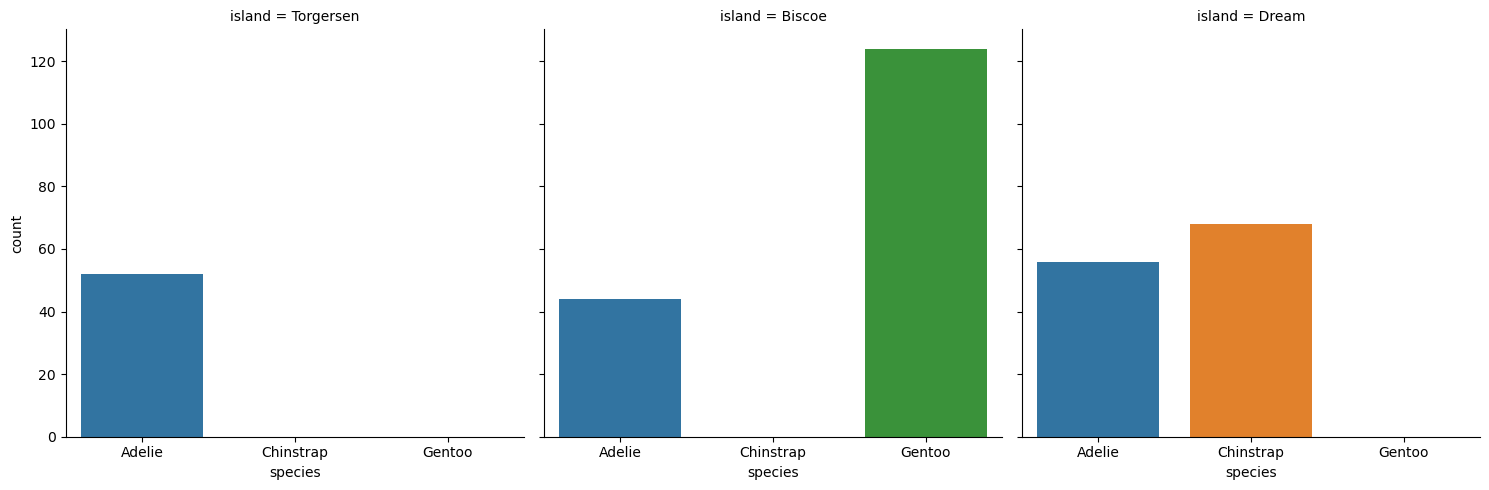

In [12]:
sns.catplot( data = penguins, x='species', col='island', kind='count' )

plt.show()

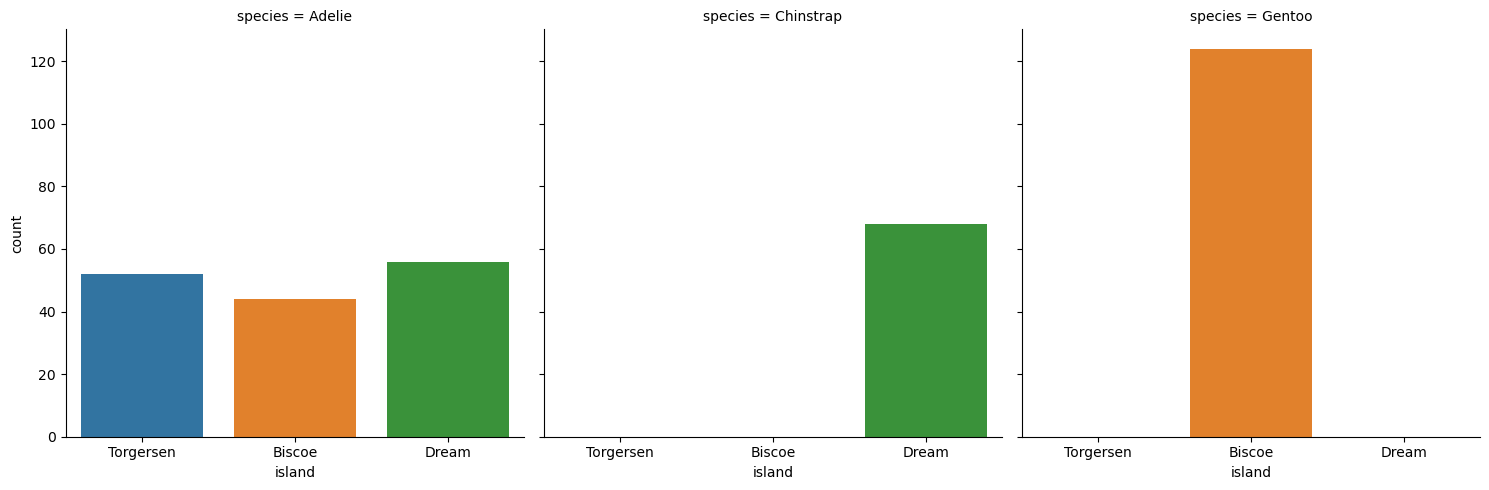

In [13]:
sns.catplot( data = penguins, x='island', col='species', kind='count' )

plt.show()

Alternatively, we could use ROW facets.

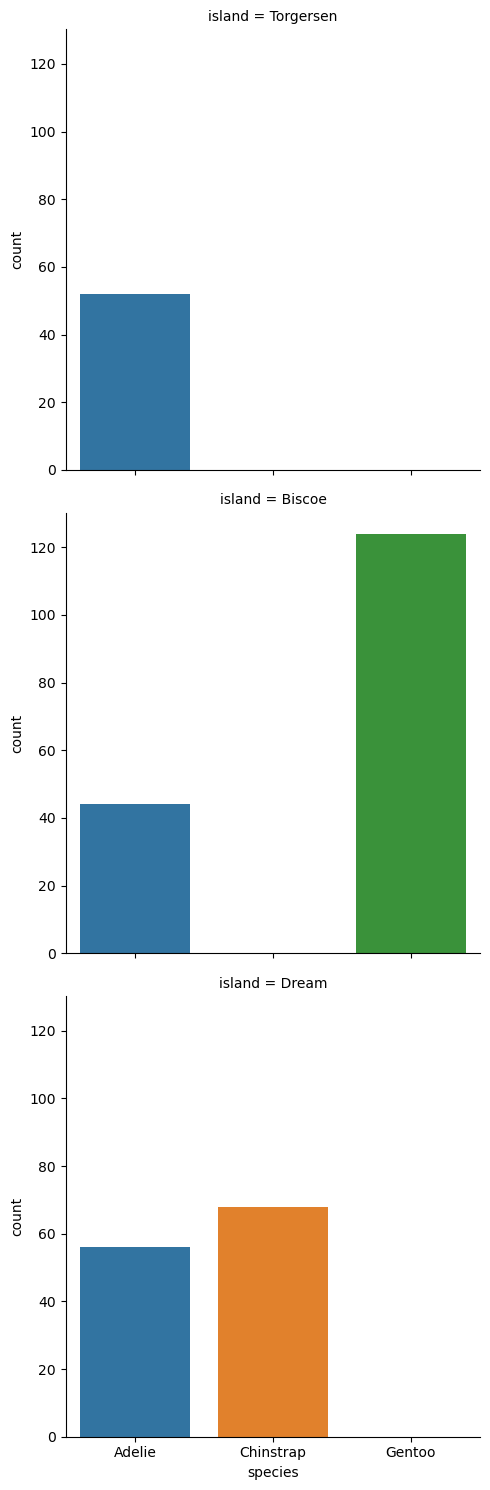

In [14]:
sns.catplot(data = penguins, x='species', row='island', kind='count')

plt.show()

A more common way of showing the combination via bar charts with the **DODGED BAR CHART**.

The second categorical variable is used to COLOR the bar!!!

Associating color with a column/variable within the dataframe is known as the `hue` argument.

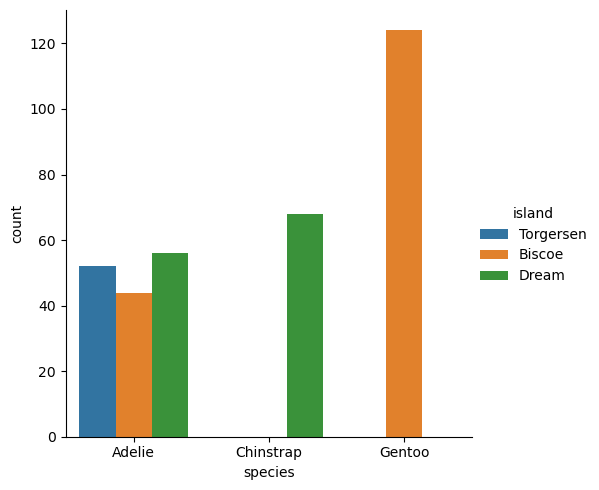

In [15]:
sns.catplot( data = penguins, x='species', hue='island', kind='count' )

plt.show()

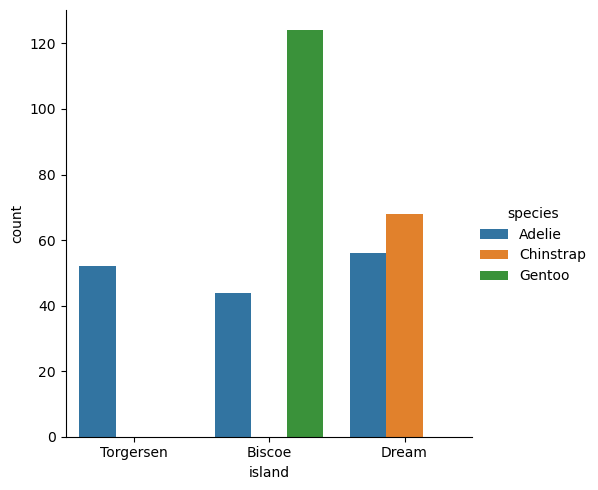

In [16]:
sns.catplot(data = penguins, x='island', hue='species', kind='count')

plt.show()

We can use faceted bar charts and dodged bar charts to deal with the combination of 3 categorical variables.

For faceted bar charts, we can use one variable for ROW facets and another for COLUMN facets.

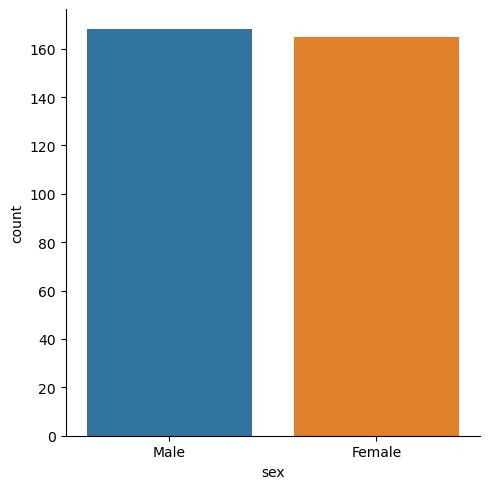

In [17]:
sns.catplot(data = penguins, x='sex', kind='count')

plt.show()

In [18]:
penguins.groupby(['species', 'island', 'sex']).size().reset_index(name='num_rows')

,species,island,sex,num_rows
0,Adelie,Biscoe,Female,22
1,Adelie,Biscoe,Male,22
2,Adelie,Dream,Female,27
3,Adelie,Dream,Male,28
4,Adelie,Torgersen,Female,24
5,Adelie,Torgersen,Male,23
6,Chinstrap,Dream,Female,34
7,Chinstrap,Dream,Male,34
8,Gentoo,Biscoe,Female,58
9,Gentoo,Biscoe,Male,61


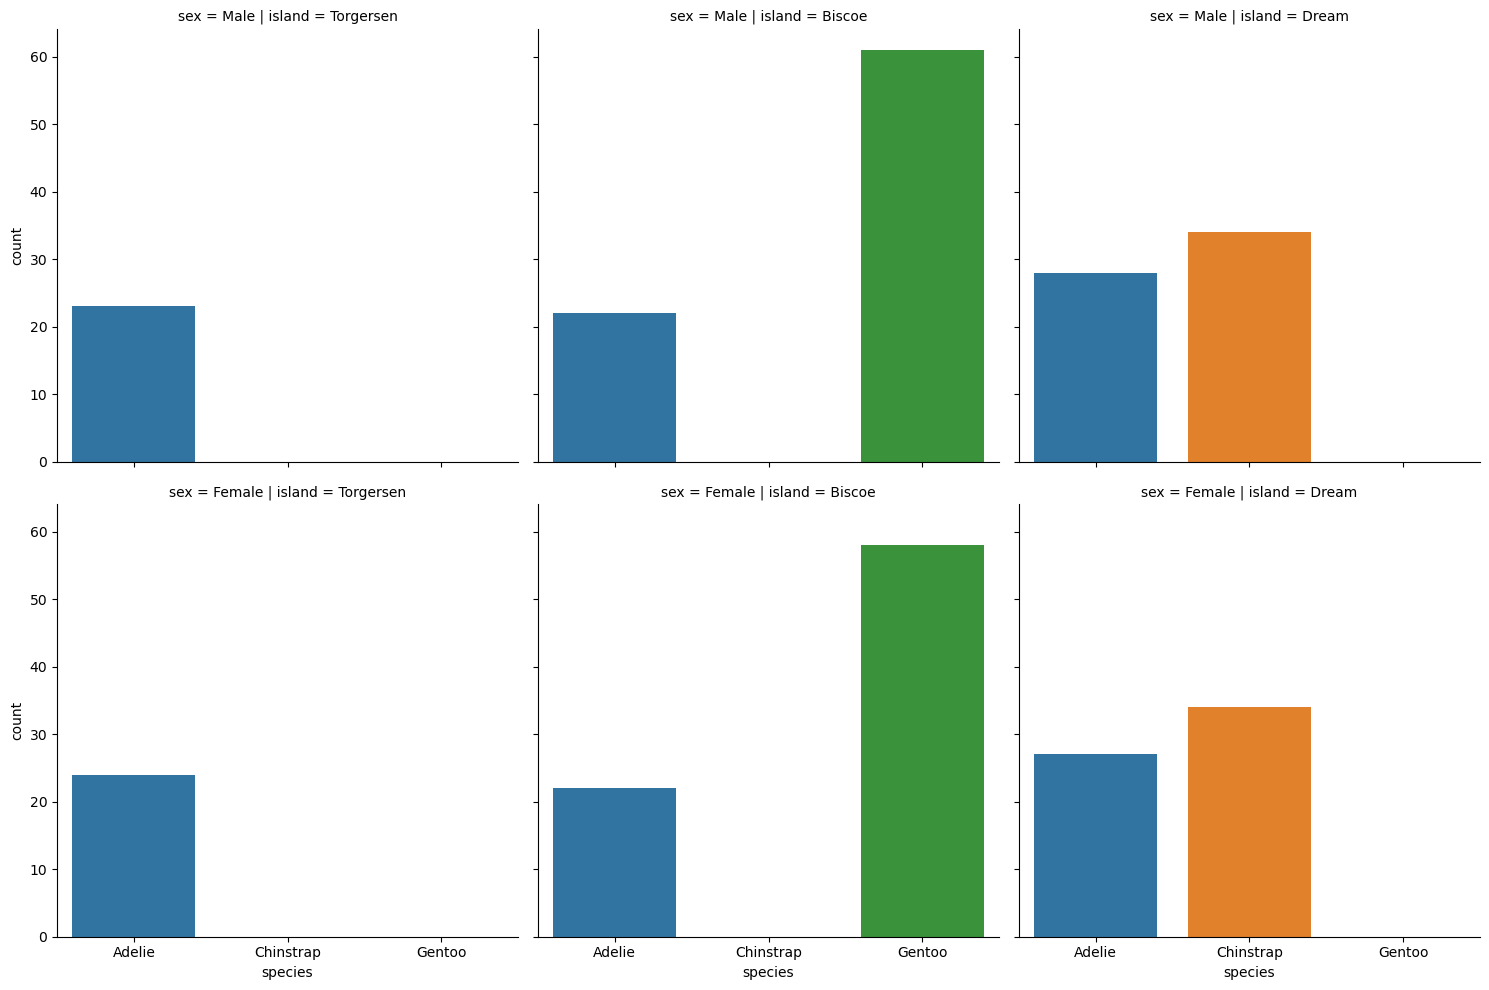

In [19]:
sns.catplot(data = penguins, x='species', row='sex', col='island', kind='count')

plt.show()

3 categoricals can be shown with dodged bar charts because 1 of the variables must be assigned to the facet!

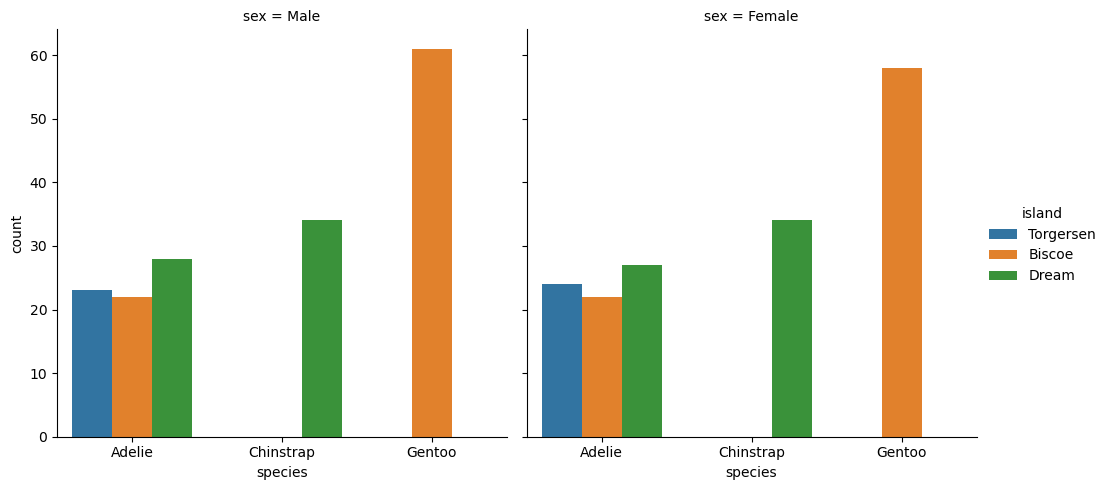

In [20]:
sns.catplot(data = penguins, x='species', hue='island', col='sex', kind='count')

plt.show()

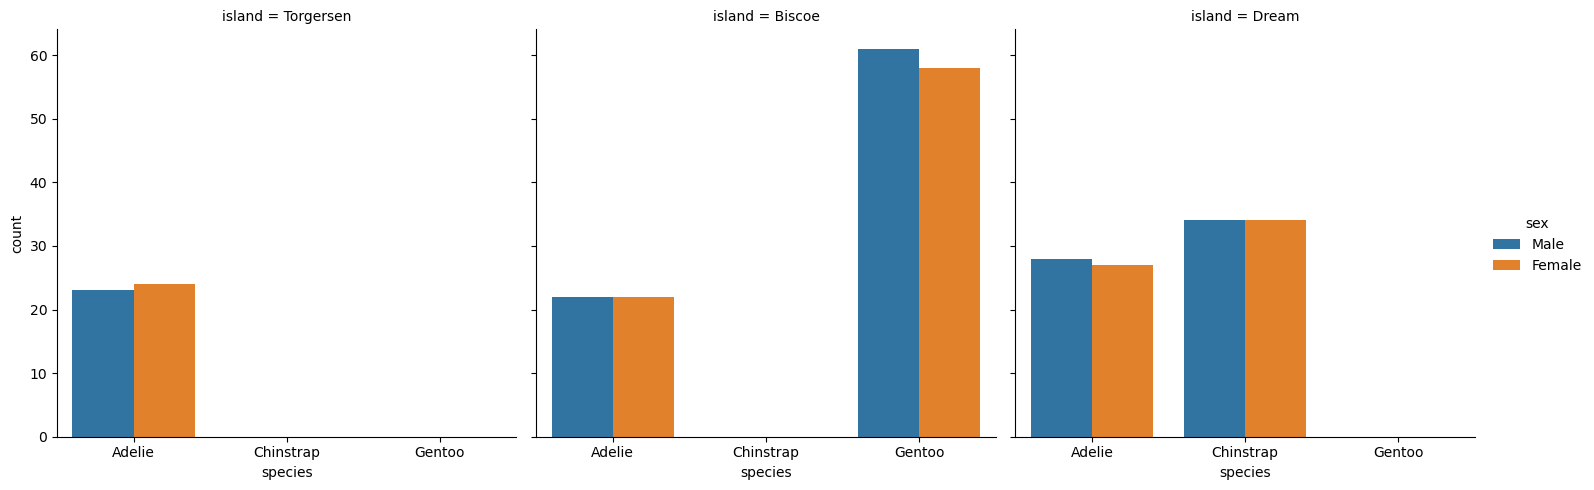

In [21]:
sns.catplot(data = penguins, x='species', hue='sex', col='island', kind='count')

plt.show()

## Heat maps

Bar charts show counts via the height of the bar. Heat maps show the count via color within the tile.

Let's first look at the raw data, focusing on the combination of 2 categorical variables.

In [22]:
penguins.groupby(['species', 'island']).size().reset_index(name='num_rows')

,species,island,num_rows
0,Adelie,Biscoe,44
1,Adelie,Dream,56
2,Adelie,Torgersen,52
3,Chinstrap,Dream,68
4,Gentoo,Biscoe,124


We need to reshape or reformat the way the counts are organized. We need the values for the categoricals to be the COLUMN NAMES and the ROW INDEX. The values in the cell are the COUNTS for the combinations.

The easiest way to create the counts this way with the `pd.crosstab()` function.

In [23]:
pd.crosstab( penguins.species, penguins.island )

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [24]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The counts for the combinations can be visualized through the `sns.heatmap()`. This is an AXES level function that wants the data organized in the style of `pd.crosstab()`.

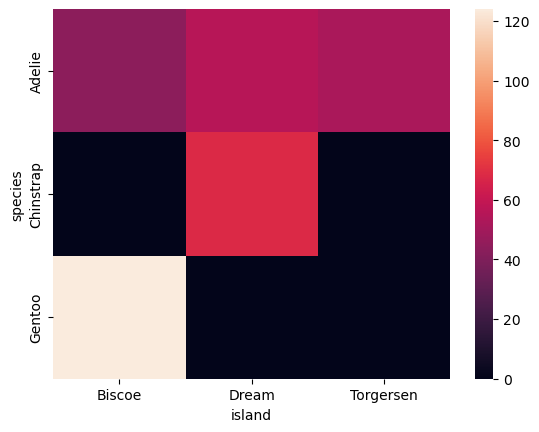

In [25]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( penguins.species, penguins.island), ax = ax )

plt.show()

What I particularly like about `sns.heatmap()` is that it is easy to ANNOTATE!!!!

Annotate means include text so we can read the number and see the color.

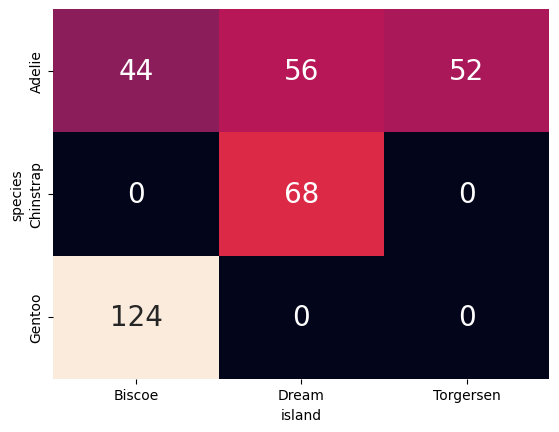

In [30]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( penguins.species, penguins.island ), ax = ax,
             annot=True, annot_kws={'size': 20}, fmt='d',
             cbar=False)

plt.show()

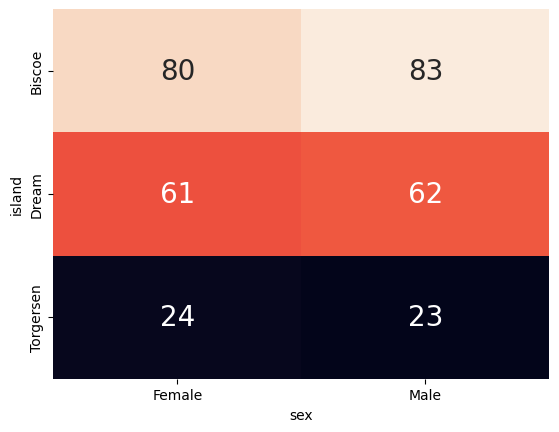

In [33]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab( penguins.island, penguins.sex ), ax = ax,
             annot = True, annot_kws={'size': 20}, cbar=False)

plt.show()